# Introductory applied machine learning (INFR10069)

<font color='red' size=5><b>Q1:</b> 43 <b>Q2:</b> 40 <b>Total:</b> 83</font>


# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [2]:
# Loads the data set and assigns to Dataframe 
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

# Displays nuber of data points and attributes in the data set
print('Number of Data Points: {}'.format(auto_numeric.shape[0]))
print('Number of Attributes: {}'.format(auto_numeric.shape[1]))

Number of Data Points: 159
Number of Attributes: 16


<font color='red'>Good.</font>

### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [3]:
# First 8 instances 
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


<font color='red'>Good.</font>

### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [4]:
# auto_numeric summary statistics (standard deviation, mean, etc)
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<font color='red'>Good.</font>

### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

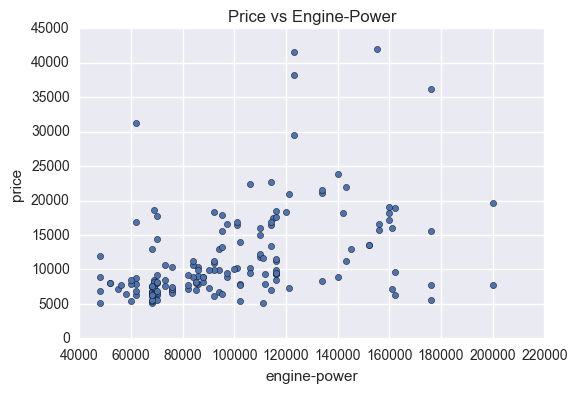

In [5]:
# Scatterplot of price against engine-power
auto_numeric.plot.scatter(x ='engine-power', y = 'price') # Independent variable (engine-power) as x-axis
plt.title('Price vs Engine-Power')                        # and dependent variable (price) as y-axis

<font color='red'>Good.</font>

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

Engine-power is not sufficient for predicting the price of an automobile because there is not an obvious correlation between the two attributes. In order for engine power to be efficient there would need to be evidence of a linear relationship on the above scatter plot. In reality, there are many features that are contributing factors to the price of a car.



<font color='red'>Good.<br><br>

There is actually a quite <b>weak</b> linear relationship between engine-power and price. It is not non-existant.</font>

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

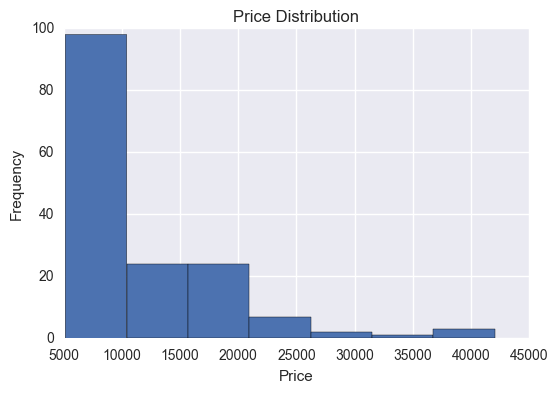

In [6]:
# Histogram of prices across data points. Bins provide price ranges of approximately 5000 dollars.
auto_numeric['price'].plot.hist(bins=7)
plt.xlabel('Price')
plt.title('Price Distribution')

<font color='red'>Good.</font>

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

Data normalization brings attribute values to within a similar range, making the coefficients easier to interpret, which can improve the performance of linear regression.


<font color='red'>No.<br><br>

The distribution of the prices poses a problem for our regression models, as they are clearly non-normally distributed. Thus, we could pre-process the data by using the log-transformation of the variable. This will hopefully improve performance by reducing the effect of outliers.</font>

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [7]:
X = np.array(auto_numeric.ix[:,'engine-power']) # Stores feature (independent) values
Y = np.array(auto_numeric.ix[:,'price']) # Stores target (dependent) values

<font color='red'>Good.</font>

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [8]:
# Reshapes array X into a 2D array for technical purposes
X_2D = np.reshape(X,(X.shape[0],-1))

# Prints the number of rows and columns to confirm that it is an nx1 array, n being the number 
# of instances found in Question 1.1
print(X_2D.shape)

(159, 1)


<font color='red'>Good.</font>

### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [9]:
# Splits price and engine-power arrays into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split (X_2D, Y, test_size = 0.2)

<font color='red'>Good.</font>

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [10]:
# Fits Linear Regression model to the training data split in 1.10.
from sklearn import linear_model

lin_reg = linear_model.LinearRegression(normalize = True)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

<font color='red'>Good.</font>

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [11]:
# Standard equation for linear regression using the intercept and coefficient 
# to predict the price of the car given the engine_power 
a = lin_reg.coef_
print('Coefficient: ', a)
b = lin_reg.intercept_
x = X_2D
y = a*x + b

Coefficient:  [ 0.08040167]


<font color='red'>Good.</font>

### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.


If one more unit of engine power is added, the price increases by the regression coefficient, a, whose magnitude shows how much the independent variable affects the dependent variable. In this example, the coefficient calculated in Question 1.12, has a small magnitude implying that it is not an important influential variable on price.



<font color='red'>No. <br><br> As one more unit of engine-power is added, a car has 0.089 pounds added to its value. In general the magnitude of the regression coefficient does not tell us if a variable is an important explanatory variable for our prediction problem. Because the regression coefficient represents the expected change in price for a one unit change in engine power, the magnitude of that coefficient is partly determined by the magnitude of the units being used.</font>

### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

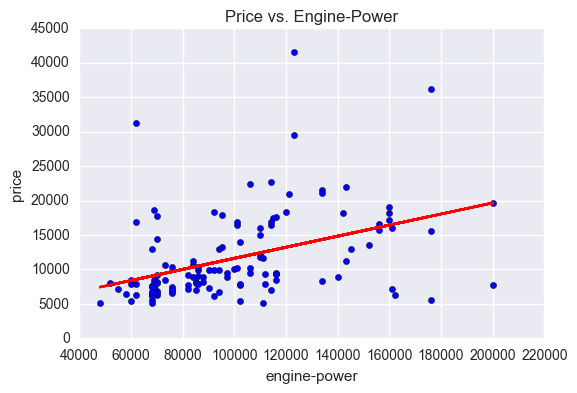

In [12]:
plt.scatter(X_train, y_train)   # Price vs. engine-power scatter plot on training data
plt.plot(X_train,lin_reg.predict(X_train), color='red')    # Plots regression line on training set
plt.xlabel('engine-power')
plt.ylabel('price')
plt.title('Price vs. Engine-Power')

<font color='red'>Good.</font>

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

Though Hold-out validation guards against overfitting on the training set, it is largely dependent on which data points end up in the training set and test set. If the original dataset is small, the training set that the model is being fit to may not be an accurate representation of the data set as a whole, or it may be costly to have to set some of the sparse data aside. 



<font color='red'>Good.</font>

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [13]:
# KFold validation on original dataset (5-fold)
k_fold = KFold(len(auto_numeric), n_folds=5, shuffle=True, random_state =0)


<font color='red'>Good.</font>

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [14]:
# KFold mean value of price in each fold
for train_index, test_index in k_fold:
    y_train, y_test = y[train_index], y[test_index]
    print('Mean Price: ', sum(y_train)/y_train.shape[0])

Mean Price:  [ 11654.50044688]
Mean Price:  [ 11518.3873752]
Mean Price:  [ 11470.90607112]
Mean Price:  [ 11286.04552725]
Mean Price:  [ 11563.75675044]



<font color='red'>Good.</font>

### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [15]:
# Linear regression model and fit
lin_reg_2 = linear_model.LinearRegression(normalize = True)
predict_fit = cross_val_predict(lin_reg_2, X_2D, Y,cv = k_fold)  

# Verification of dimensionality 
print('Dimensions of y-vector: ', Y.shape[0])
print ('Shape of prediction: ',len(predict_fit))

Dimensions of y-vector:  159
Shape of prediction:  159



<font color='red'>Good.</font>

### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [16]:
import math

#R^2 Coefficient of Determination (use X and Y instead??????????)
R2 = r2_score(Y, predict_fit)
print('R^2: ', R2)

#Root mean squared error
MSE = mean_squared_error(Y, predict_fit)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

#Mean Absolute Error
MAE = mean_absolute_error(Y, predict_fit)
print('MAE: ', MAE)

#Correlation Coefficient
CC = np.corrcoef(Y, predict_fit)
print('CC: ', CC)

R^2:  0.173005270976
RMSE:  6114.45211862
MAE:  3987.95779619
CC:  [[ 1.         0.4171222]
 [ 0.4171222  1.       ]]



<font color='red'>Good.</font>

### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

   The metrics above are measures of the distance between the true price values and the predicted values, given the independent variable, engine-power. In other words, how well the linear regression model represents the data.  The Correlation Coefficient (CC) represents the linear relationship between engine-power and price. The Coefficient of Determination (R^2) is the square of the correlation between the true and predicted price values. The Root Mean Squared Error (RMSE) is the variance between the predicted and true price values (residuals). The Mean Absolute Error (MAE) is a measure of the average variance of the residuals. 
   
   The results calculated above reinforce the observation made in Question 1.5 that engine-price alone is not a sufficient determinant of price. The difference between the RMSE and MAE implies a large variance of error. In addition, the correlation coefficient indicates that there is a weak-moderate relationship between the engine-power and price. 




<font color='red'>Good.</font>

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

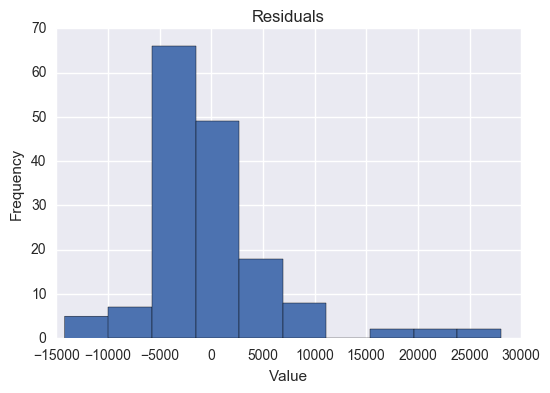

In [17]:
# Residual calculation and histogram
res = Y - predict_fit
plt.hist(res)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Residuals')

As expected, the distribution is concentrated around the the range of (-5000, 5000) with some variance.

<font color='red'>It seems that the errors are normally distributed. This is a good sign, since normality of errors is a fundamental assumption of the linear regression model.</font>

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [18]:
# Load new dataset into Dataframe
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')

X_b = np.array(auto_base.ix[:,'engine-power']) # Stores feature (independent) values
X_b_2D = np.reshape(X_b,(X_b.shape[0],-1)) # Reshapes X_b into 2D array
Y_b = np.array(auto_base.ix[:,'price']) # Stores target (dependent) values

# Linear Regression Model
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split (X_b_2D, Y_b, test_size = 0.2)
lin_reg_b = linear_model.LinearRegression(normalize = True)
lin_reg_b.fit(X_b_train, y_b_train)

predict_fit_b = cross_val_predict(lin_reg_b, X_b_2D, Y_b,cv = k_fold)  

#R^2 Coefficient of Determination
R2_b = r2_score(Y_b, predict_fit_b)
print('R^2: ', R2_b)

#Root mean squared error
MSE_b = mean_squared_error(Y_b, predict_fit_b)
RMSE_b = math.sqrt(MSE_b)
print('RMSE: ', RMSE_b)

#Mean Absolute Error
MAE_b = mean_absolute_error(Y_b, predict_fit_b)
print('MAE: ', MAE_b)

#Correlation Coefficient
CC_b = np.corrcoef(Y_b, predict_fit_b)
print('CC: ', CC_b)

R^2:  -0.00213595381121
RMSE:  6730.84360395
MAE:  4901.86096203
CC:  [[ 1.         -0.06191442]
 [-0.06191442  1.        ]]



<font color='red'>Good.</font>

### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

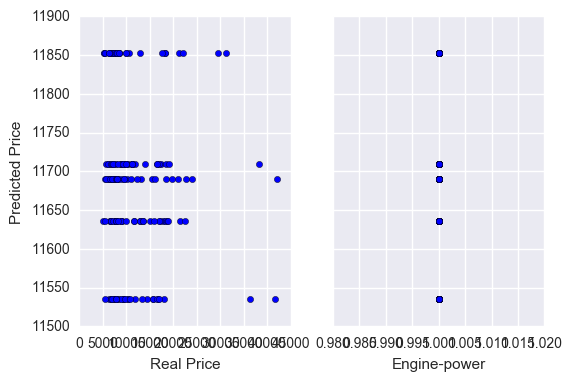

In [19]:
# Scatter plot with two subplits that share a y-axis
f, (plot1, plot2) = plt.subplots(1, 2, sharey=True)

plot1.scatter(Y_b, predict_fit_b)
plot1.set_xlabel('Real Price')
plot1.set_ylabel('Predicted Price')

plot2.scatter(X_b_2D, predict_fit_b)
plot2.set_xlabel('Engine-power')


<font color='red'>Good.</font>

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

The simplest baseline model for the purposes of regression is the average of y (target-predicted price) values across all x (independent-real price or engine-power) values.  The 5-fold cross-validation that was built in preceeding questions, results in 5 prediction averages, which can be seen and justified in the subplots in Question 1.23.


<font color='red'>Good.</font>

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [20]:
# Displays statistics for auto_base file
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


 The model preforms so poorly because the dataset contains a consistent engine-power of 1.0 (though the price still varies), as seen by the statistics displayed above.


<font color='red'>Good.</font>

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function useful for this question.*

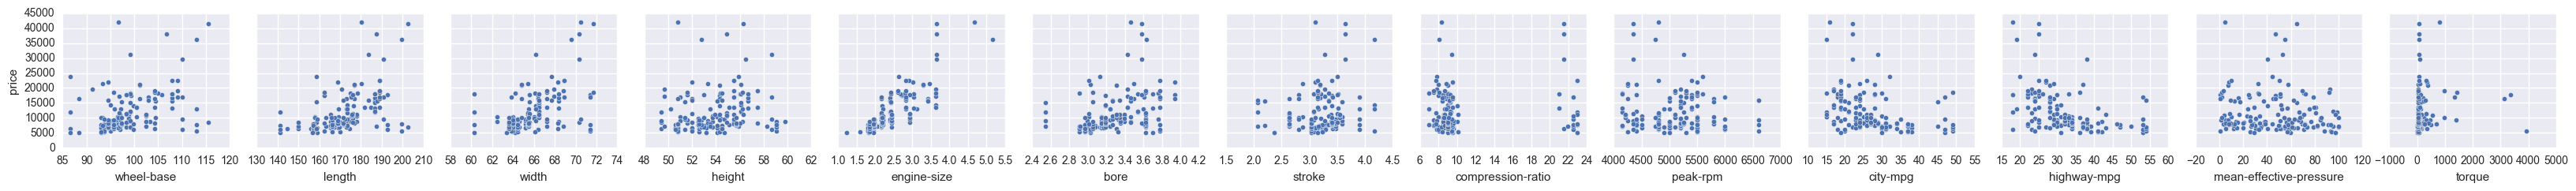

In [34]:
# Individual scatter plots of each attribute vs. price (with the exception of engine-power)
sns.pairplot(auto_numeric, x_vars = ['wheel-base', 'length', 'width', 'height','engine-size', 'bore', 'stroke','compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg','mean-effective-pressure', 'torque'] , y_vars = ['price'])

Based on the pairplot above, the only attribute that seems to have a significant correlation is engine-size, but, for example, highway-mpg may also be useful. Based on this observation, these attributes may be useful in predicting the price of the automobile. In contrast, examples of attributes that are useless predictors are torque and compression-ratio because there is no obvious relationship with the target attribute, price. As a result, such attributes can be safetly removed with impacting the preformance of a linear regression model.

<font color='red'>
Useful atributes: Good <br>
Useless attributes: Good <br>
Corellated attributes: Should have plotted attributes against each other using pairplot.<br>
Can be removed: OK, but we can also remove an attributed from a pair of correlated ones.
</font>

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [35]:
# Multivariate (multiple) regression model
mult_reg = linear_model.LinearRegression(normalize =True)

X_mult = np.array(auto_numeric.ix[:,0:15])
Y_mult =  np.array(auto_numeric.ix[:,'price'])

# Predicts outputs
predict_fit_mult = cross_val_predict(mult_reg, X_mult, Y_mult,cv = k_fold) 
print(predict_fit_mult)

[ 10114.99417556  15539.37504663  17016.77744845  13623.33942508
  10267.07167359  12823.21780768  17405.79266981  15062.88857598
  -4811.10940221   8517.01059637   5093.0844148    6347.05267984
   9039.60761098   6135.30348568   8531.21052753   5753.58475215
   6012.71147308  12004.61712329  16053.48666709   1708.59014666
   7255.96829773   2998.39902612   7467.30363685   6080.44145057
  12438.63224789  11010.57314337   9563.68376812  10976.23820592
   9301.73620073   9681.40953735   9875.7076315    9195.90131661
  34105.40686691   4408.00603674   6365.66874415   5835.86656277
   5819.06732214   6708.74746454  10183.8990061   15886.58047852
  12184.04266843  11342.16527002  11873.70154451  14511.6619892
  24566.6173531   24191.20628123  25122.3682146   26800.98049259
  31606.41848651   6104.23536199   5604.79425728   6138.45757046
   6047.43998776  10864.75791106  10471.76343389  11720.39543014
  10967.07660877   8027.31591467   9626.19458573   7643.97717043
   4825.82983906   5786.52

<font color='red'>Good.</font>

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [23]:
#Root mean squared error
MSE_mult = mean_squared_error(Y_mult, predict_fit_mult)
RMSE_mult = math.sqrt(MSE_mult)
print('RMSE: ', RMSE_mult)

#Mean Absolute Error
MAE_mult = mean_absolute_error(Y_mult, predict_fit_mult)
print('MAE: ', MAE_mult)

#Correlation Coefficient
CC_mult = np.corrcoef(Y_mult, predict_fit_mult)
print('CC: ', CC_mult)

RMSE:  4819.80464283
MAE:  3050.34459963
CC:  [[ 1.          0.74256027]
 [ 0.74256027  1.        ]]


<font color='red'>Good.</font>

### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

The metric above, compared to the metric in Question 1.19, has a lower root mean squared error and mean absolute error, smaller variance between RMSE and MAE, as well as a higher correlation coefficient that shows a strong linear relationship.

<font color='red'>Good.</font>

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

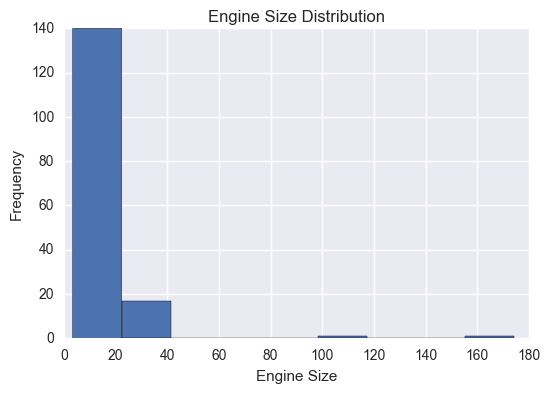

In [24]:
# Histogram of engine-size across data points. 
auto_numeric['engine-size'].plot.hist(bins=9)
plt.xlabel('Engine Size')
plt.title('Engine Size Distribution')

<font color='red'>Good.</font>

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

The engine-size data above is not well distributed and shows extreme outliers. This could in fact cause a problem for regression because regression is sensitive to outliers and it would not produce a linear relationship between engine-size attribute and outputs. As a result, a transformation is necessary to produce this desired linear relationship.

<font color='red'>Good.</font>

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

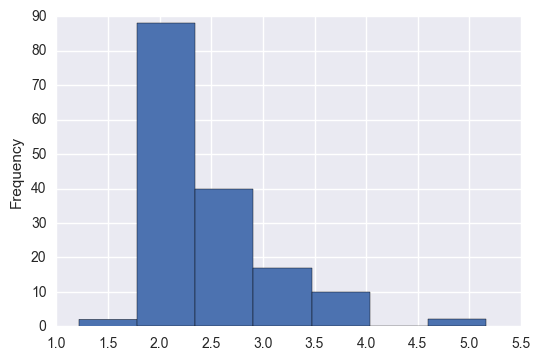

In [25]:
# Log tranform of engine-size attribute
auto_numeric['engine-size'] = np.log(auto_numeric['engine-size'])
auto_numeric['engine-size'].plot.hist(bins=7)

<font color='red'>Good.</font>

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [33]:
# Your code goes here
mult_reg1 = linear_model.LinearRegression(normalize =True)

X_mult1 = np.array(auto_numeric.ix[:,0:15])
Y_mult1 =  np.array(auto_numeric.ix[:,'price'])

predict_fit_mult1 = cross_val_predict(mult_reg1, X_mult1, Y_mult1,cv = k_fold) 

#R^2 Coefficient of Determination
R2_mult = r2_score(Y_mult1, predict_fit_mult1)
print('R^2: ', R2_mult)

#Root mean squared error
MSE_mult1 = mean_squared_error(Y_mult1, predict_fit_mult1)
RMSE_mult1 = math.sqrt(MSE_mult1)
print('RMSE: ', RMSE_mult1)

#Mean Absolute Error
MAE_mult1 = mean_absolute_error(Y_mult1, predict_fit_mult1)
print('MAE: ', MAE_mult1)

#Correlation Coefficient
CC_mult1= np.corrcoef(Y_mult1, predict_fit_mult1)
print('CC: ', CC_mult1)

R^2:  0.689612268029
RMSE:  3745.91959756
MAE:  2668.36429567
CC:  [[ 1.          0.83167532]
 [ 0.83167532  1.        ]]


<font color='red'>Good.</font>

### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

After the transformation of the engine-size and rebuilding of the linear model, the Root Mean Squared Error decreased, the Mean Absolute Error decreased, and as a result the difference between RMSE and MAE also decreased. In addition, the correlation coefficient increased. Such results demonstrate improved performance in the model. 

<font color='red'>Good.</font>

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [27]:
pd.set_option('max_columns', 30)

In [28]:
# Loads new dataset into dataframe
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')

# Displays number of samples and attributes in dataset
print('Number of Rows: ', auto_full.shape[0])
print('Number of Columns: ', auto_full.shape[1])

# Displays first 20 instances in dataframe
auto_full.head(20)

Number of Rows:  159
Number of Columns:  27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


<font color='red'>Good.</font>

### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

The variables in the dataset that are categorical include make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, and fuel-system. These nominal attributes can not be used in their current form for the purposes of regression because regression can only be used when what is being predicted is a number. 


<font color='red'>Good.</font>

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [52]:
from sklearn import preprocessing

# Copy of auto_full data set
auto_full_edit = auto_full.copy()

categorical_columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location','engine-type','fuel-system']
categorical_values = np.array(auto_full_edit[categorical_columns])

trans = preprocessing.LabelEncoder()

auto_data = trans.fit_transform(categorical_values[:,0])
for i in range (1, categorical_values.shape[1]):
    auto_data = np.column_stack((auto_data, trans.fit_transform(categorical_values[:,i])))

categorical_values = auto_data.astype(float)
categorical_values = categorical_values.astype(float)

encode = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7])
array_X_enc = encode.fit_transform(categorical_values)
array_X_enc.shape

(159, 42)

<font color='red'>Incorrect tranformation.</font>

### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [53]:
mult_reg2 = linear_model.LinearRegression(normalize =True)

X_mult2 = array_X_enc
Y_mult2 =  np.array(auto_full.ix[:,'price'])

predict_fit_mult2 = cross_val_predict(mult_reg2, X_mult2, Y_mult2, cv = k_fold) 

#R^2 Coefficient of Determination
R2_mult2 = r2_score(Y_mult2, predict_fit_mult2)
print('R^2: ', R2_mult2)

#Root mean squared error
MSE_mult2 = mean_squared_error(Y_mult2, predict_fit_mult2)
RMSE_mult2 = math.sqrt(MSE_mult2)
print('RMSE: ', RMSE_mult2)

#Mean Absolute Error
MAE_mult2 = mean_absolute_error(Y_mult2, predict_fit_mult2)
print('MAE: ', MAE_mult2)

#Correlation Coefficient
CC_mult2= np.corrcoef(Y_mult2, predict_fit_mult2)
print('CC: ', CC_mult2)



R^2:  0.689612268029
RMSE:  3745.91959756
MAE:  2668.36429567
CC:  [[ 1.          0.83167532]
 [ 0.83167532  1.        ]]

R^2:  0.798684871096
RMSE:  3016.78516968
MAE:  1981.24535575
CC:  [[ 1.          0.89614953]
 [ 0.89614953  1.        ]]


<font color='red'>Good, but based on erroneously tranformed data.</font>

### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

This more complex model has a performance slightly better than the model in 2.8 and 2.3. One of the main advantages of using a more complex model, such as the one above, is the ability to include additional attibutes that can other wise not be included with numeric attributes. However, a disadvantage, is that the preformance of the model is heavily dependent on the categorical attributes transformed and their usefulness. 


<font color='red'>Advantage: better performance
<br>
Disadvantages: interpretability, computational resources, need for more training data</font>

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

In [37]:
# Decision Tree Regression
regressor = DecisionTreeRegressor()

dtree = regressor.fit(X_mult1,Y_mult1)
predict_fit_tree = cross_val_predict(dtree, X_mult1, Y_mult1,cv = k_fold) 
print('Decision Tree Regressor:')

#R^2 Coefficient of Determination
R2_tree = r2_score(Y_mult1, predict_fit_tree)
print('R^2: ', R2_tree)

#Root mean squared error
MSE_tree= mean_squared_error(Y_mult1, predict_fit_tree)
RMSE_tree = math.sqrt(MSE_tree)
print('RMSE: ', RMSE_tree)

#Mean Absolute Error
MAE_tree = mean_absolute_error(Y_mult1, predict_fit_tree)
print('MAE: ', MAE_tree)

#Correlation Coefficient
CC_tree= np.corrcoef(Y_mult1, predict_fit_tree)
print('CC: ', CC_tree)


# Random Forest Regression
regressor2 = RandomForestRegressor()
rand = regressor.fit(X_mult1,Y_mult1)
predict_fit_rand = cross_val_predict(rand, X_mult1,Y_mult1, cv = k_fold)
print('')
print('Random Forest Regressor:')

#R^2 Coefficient of Determination
R2_rand = r2_score(Y_mult1, predict_fit_rand)
print('R^2: ', R2_rand)

#Root mean squared error
MSE_rand= mean_squared_error(Y_mult1, predict_fit_rand)
RMSE_rand = math.sqrt(MSE_rand)
print('RMSE: ', RMSE_rand)

#Mean Absolute Error
MAE_rand = mean_absolute_error(Y_mult1, predict_fit_rand)
print('MAE: ', MAE_rand)

#Correlation Coefficient
CC_rand= np.corrcoef(Y_mult1, predict_fit_rand)
print('CC: ', CC_rand)

Decision Tree Regressor:
R^2:  0.62075051147
RMSE:  4140.65150132
MAE:  2821.58490566
CC:  [[ 1.          0.82423683]
 [ 0.82423683  1.        ]]

Random Forest Regressor:
R^2:  0.646860047104
RMSE:  3995.57792515
MAE:  2716.79245283
CC:  [[ 1.         0.8329337]
 [ 0.8329337  1.       ]]


When DecisionTreeRegressor and RandomForestRegressor are used to predict the price based on feature values, the performance is comparable to that of the multivariate linear regression model in 2.8. All cross-validation scores for R^2, RMSE,MAE,and CC are within the same ranges. Based on these results, the model used in 2.8 is a reasonable choice to fit the data. 

<font color='red'>Good.</font>